Minute Weather Data Description

The minute weather dataset contains raw sensor measurements captured at one-minute intervals. 

This data comes from a weather station located in San Diego, California. Data was collected for a period of three years, from September 2011 to September 2014, to ensure that sufficient data for different seasons and weather conditions is captured.

Each row, or sample, consists of the following variables:

    rowID: unique number for each row (Unit: NA)
    hpwren_timestamp: timestamp of measure (Unit: year-month-day hour:minute:second)
    air_pressure: air pressure measured at the timestamp (Unit: hectopascals)
    air_temp: air temperature measure at the timestamp (Unit: degrees Fahrenheit)
    avg_wind_direction: wind direction averaged over the minute before the timestamp (Unit: degrees, with 0 means coming from the North, and increasing clockwise)
    avg_wind_speed: wind speed averaged over the minute before the timestamp (Unit: meters per second)
    max_wind_direction: highest wind direction in the minute before the timestamp (Unit: degrees, with 0 being North and increasing clockwise)
    max_wind_speed: highest wind speed in the minute before the timestamp (Unit: meters per second)
    min_wind_direction: smallest wind direction in the minute before the timestamp (Unit: degrees, with 0 being North and inceasing clockwise)
    min_wind_speed: smallest wind speed in the minute before the timestamp (Unit: meters per second)
    rain_accumulation: amount of accumulated rain measured at the timestamp (Unit: millimeters)
    rain_duration: length of time rain has fallen as measured at the timestamp (Unit: seconds)
    relative_humidity: relative humidity measured at the timestamp (Unit: percent)


In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import utils
import pandas as pd
import numpy as np
from itertools import cycle, islice
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

%matplotlib inline

In [7]:
weather = pd.read_csv('H:\\Datatsets\\minute_weather.csv')

In [9]:
print(weather.shape)
weather.head(5)

(1587257, 13)


,rowID,hpwren_timestamp,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity
0,0,2011-09-10 00:00:49,912.3,64.76,97.0,1.2,106.0,1.6,85.0,1.0,NaN,NaN,60.5
1,1,2011-09-10 00:01:49,912.3,63.86,161.0,0.8,215.0,1.5,43.0,0.2,0.0,0.0,39.9
2,2,2011-09-10 00:02:49,912.3,64.22,77.0,0.7,143.0,1.2,324.0,0.3,0.0,0.0,43.0
3,3,2011-09-10 00:03:49,912.3,64.40,89.0,1.2,112.0,1.6,12.0,0.7,0.0,0.0,49.5
4,4,2011-09-10 00:04:49,912.3,64.40,185.0,0.4,260.0,1.0,100.0,0.1,0.0,0.0,58.8


In [11]:
weather.isnull().sum()

rowID                   0
hpwren_timestamp        0
air_pressure            0
air_temp                0
avg_wind_direction    433
avg_wind_speed        433
max_wind_direction    433
max_wind_speed        433
min_wind_direction    433
min_wind_speed        433
rain_accumulation       1
rain_duration           1
relative_humidity       0
dtype: int64

In [12]:
weather.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
rowID,1587257.0,793628.000000,458201.772448,0.00,396814.0,793628.00,1190442.00,1587256.00
air_pressure,1587257.0,916.830127,3.051593,905.00,914.8,916.70,918.70,929.50
air_temp,1587257.0,61.851440,11.833624,31.64,52.7,62.24,70.88,99.50
avg_wind_direction,1586824.0,161.965379,95.208120,0.00,62.0,182.00,217.00,359.00
avg_wind_speed,1586824.0,2.774272,2.060758,0.00,1.3,2.20,3.80,32.30
max_wind_direction,1586824.0,163.403048,92.367234,0.00,68.0,187.00,223.00,359.00
max_wind_speed,1586824.0,3.399813,2.423167,0.10,1.6,2.70,4.60,36.00
min_wind_direction,1586824.0,166.826371,97.462746,0.00,77.0,180.00,212.00,359.00
min_wind_speed,1586824.0,2.133130,1.745345,0.00,0.8,1.60,3.00,32.00
rain_accumulation,1587256.0,0.001855,0.960972,0.00,0.0,0.00,0.00,655.01


In [19]:
print(weather[weather['rain_accumulation'] == 0].shape)
print(weather[weather['rain_accumulation'] != 0].shape)
print(weather[weather['rain_duration'] == 0].shape)
print(weather[weather['rain_duration'] != 0].shape)

(1577452, 13)
(9371, 13)
(1571710, 13)
(15113, 13)


In [17]:
print(9337/60)
print(1577880/60)

155.61666666666667
26298.0


In [18]:
weather = weather.dropna()

Since rain accumulation has a negligible mean value with 155 hours of rain in comparison with 26298 hours of total meausrement.Hence we Drop rain accumulation from list of features. 

In [22]:
featdf = weather.drop(["rain_accumulation","rowID","hpwren_timestamp"], axis = 1)

In [23]:
featdf.head()

,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_duration,relative_humidity
1,912.3,63.86,161.0,0.8,215.0,1.5,43.0,0.2,0.0,39.9
2,912.3,64.22,77.0,0.7,143.0,1.2,324.0,0.3,0.0,43.0
3,912.3,64.40,89.0,1.2,112.0,1.6,12.0,0.7,0.0,49.5
4,912.3,64.40,185.0,0.4,260.0,1.0,100.0,0.1,0.0,58.8
5,912.3,63.50,76.0,2.5,92.0,3.0,61.0,2.0,0.0,62.6


Features Scaling using StandardScaler 

In [25]:
X = StandardScaler().fit_transform(featdf)
X

array([[-1.4845933 ,  0.16942291, -0.01014011, ..., -1.10759267,
        -0.00660508, -0.29367037],
       [-1.4845933 ,  0.19984704, -0.89241793, ..., -1.0502974 ,
        -0.00660508, -0.1753875 ],
       [-1.4845933 ,  0.2150591 , -0.76637824, ..., -0.82111633,
        -0.00660508,  0.07262495],
       ...,
       [-0.30484867,  1.0821467 , -1.54362298, ..., -0.53464   ,
        -0.00660508, -0.04947349],
       [-0.30484867,  1.0821467 , -1.61714614, ..., -0.42004946,
        -0.00660508, -0.05328907],
       [-0.30484867,  1.0821467 , -1.57513291, ..., -0.3627542 ,
        -0.00660508, -0.04947349]])

In [26]:
kmeans = KMeans(n_clusters=12) #for 12 months
mod = kmeans.fit(X)
print("model\n", mod)

model
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=12, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)


Cluster Centres

In [28]:
centers = mod.cluster_centers_
centers

array([[ 2.40630018e-02, -9.85248217e-01,  6.02062604e-01,
        -5.68281470e-01,  7.91240781e-01, -5.43157670e-01,
         3.40805932e-01, -5.85241030e-01, -1.34730009e-03,
         1.17530408e+00],
       [ 5.17578833e-01,  4.88661195e-01, -1.19953327e+00,
        -3.76275710e-01, -1.10279342e+00, -3.96167303e-01,
        -1.35672767e+00, -3.28991948e-01, -5.62406158e-03,
        -8.52585241e-01],
       [-1.10126928e+00, -7.32580412e-01,  4.53233162e-01,
         2.01716242e+00,  5.36056919e-01,  1.93650476e+00,
         2.85122951e-01,  2.06578934e+00,  2.16916574e-02,
         8.00692168e-01],
       [-1.17052892e-01,  6.20108868e-01,  2.16130532e-01,
        -6.50344843e-01,  4.00941001e-01, -6.48117288e-01,
        -2.85560506e-02, -6.27547075e-01, -6.29416545e-03,
        -4.47727413e-01],
       [-1.54173032e-01,  6.06956612e-01,  4.06781525e-01,
         5.99875511e-01,  5.09290341e-01,  5.34821015e-01,
         2.45377309e-01,  6.51481314e-01, -6.28752054e-03,
        -2.

In [30]:
# Function that creates a DataFrame with a column for Cluster Number

def pd_centers(featuresUsed, centers):
    colNames = list(featuresUsed)
    colNames.append('prediction')

    # Zip with a column called 'prediction' (index)
    Z = [np.append(A, index) for index, A in enumerate(centers)]

    # Convert to pandas data frame for plotting
    P = pd.DataFrame(Z, columns=colNames)
    P['prediction'] = P['prediction'].astype(int)
    return P

In [31]:
# Function that creates Parallel Plots

def parallel_plot(data):
    my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(data)))
    plt.figure(figsize=(15,8)).gca().axes.set_ylim([-3,+3])
    parallel_coordinates(data, 'prediction', color = my_colors, marker='o')

In [32]:
P = pd_centers(featdf, centers)
P

,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_duration,relative_humidity,prediction
0,0.024063,-0.985248,0.602063,-0.568281,0.791241,-0.543158,0.340806,-0.585241,-0.001347,1.175304,0
1,0.517579,0.488661,-1.199533,-0.376276,-1.102793,-0.396167,-1.356728,-0.328992,-0.005624,-0.852585,1
2,-1.101269,-0.732580,0.453233,2.017162,0.536057,1.936505,0.285123,2.065789,0.021692,0.800692,2
3,-0.117053,0.620109,0.216131,-0.650345,0.400941,-0.648117,-0.028556,-0.627547,-0.006294,-0.447727,3
4,-0.154173,0.606957,0.406782,0.599876,0.509290,0.534821,0.245377,0.651481,-0.006288,-0.205170,4
5,1.228367,-0.249663,-1.151880,1.891196,-1.055793,1.985924,-1.301456,1.687226,-0.005670,-1.106526,5
6,-0.116949,-0.554884,-1.071607,-0.574092,-0.952798,-0.603797,-1.245868,-0.504847,-0.001324,0.747435,6
7,0.235619,0.698913,1.425593,-0.624854,1.670614,-0.580634,1.127113,-0.669717,-0.006430,-0.683082,7
8,0.042521,0.056854,-0.142482,0.429807,0.025950,0.421013,-0.345018,0.405002,536.742182,-0.195992,8
9,-0.766925,-1.184683,0.373998,0.519503,0.481008,0.507060,0.191833,0.495138,0.011646,1.335497,9


What a dry day looks like

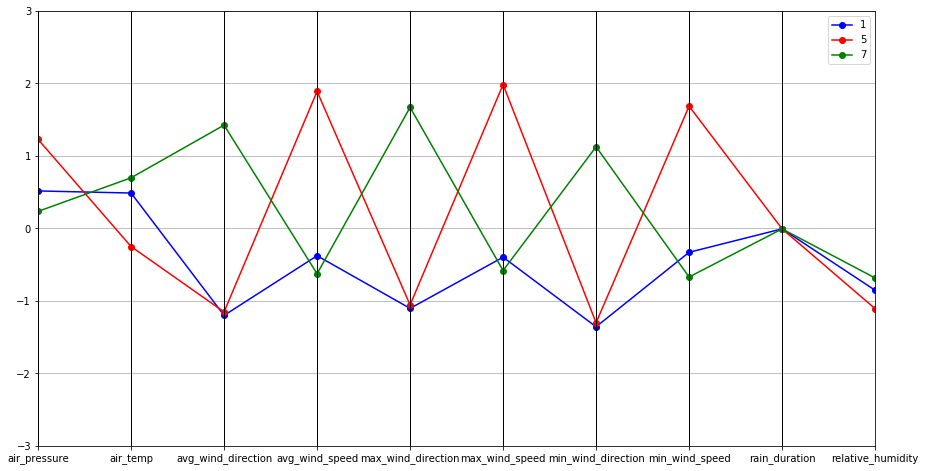

In [33]:
parallel_plot(P[P['relative_humidity'] < -0.5])

What a warm day looks like

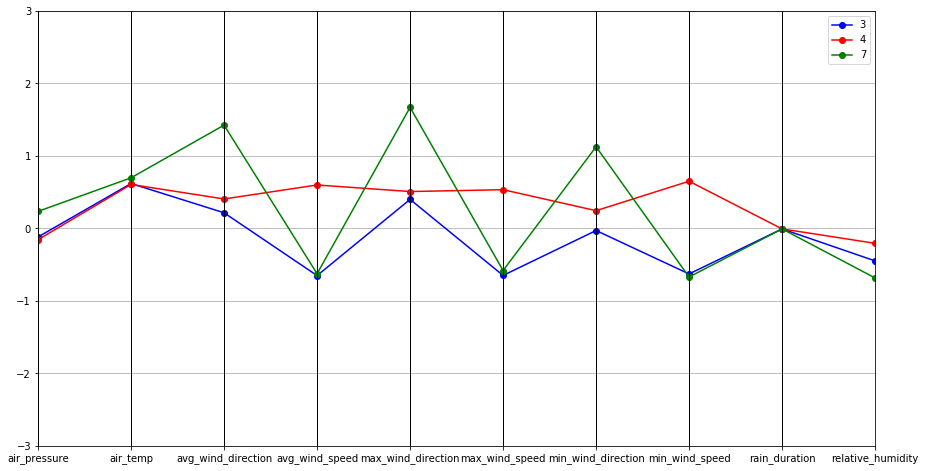

In [35]:
parallel_plot(P[P['air_temp'] > 0.5])

What a Cold day looks like

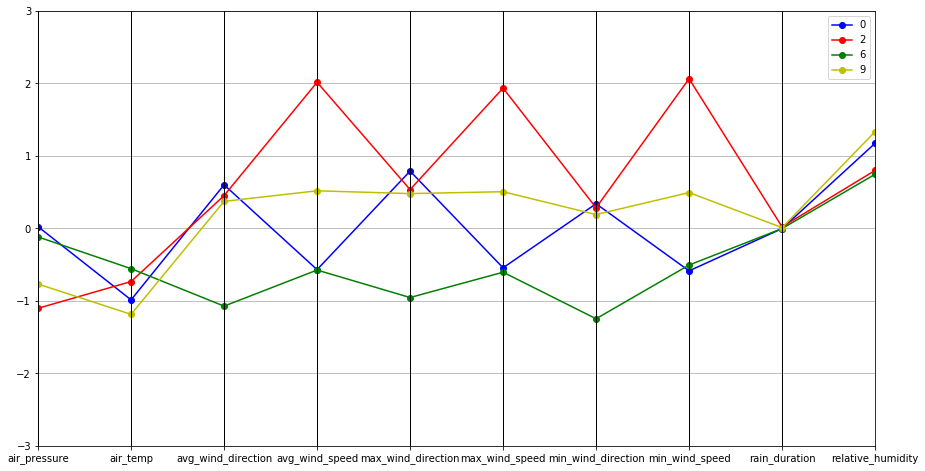

In [37]:
parallel_plot(P[(P['rain_duration'] > 5) & (P['air_temp'] < 0.5)])

What a rainy day looks like

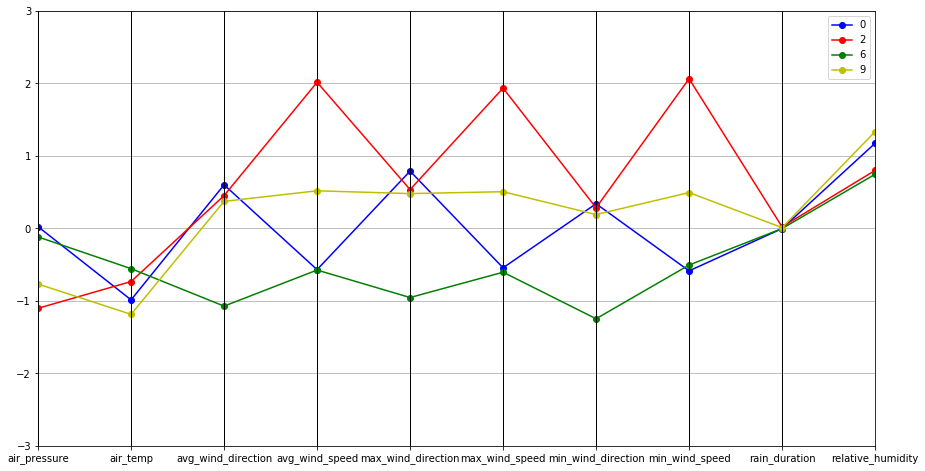

In [38]:
parallel_plot(P[(P['relative_humidity'] > 0.5) & (P['air_temp'] < 0.5)])